In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import numpy as np
from trigdat_reader import *
import os
from glob import glob
import json
import warnings
warnings.simplefilter('ignore')

all_det_list = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9','na','nb','b0','b1']

In [31]:
#trigger number
trigger = ''
#path of the trigdat file
data_dir = ''

#source and background time intervals
src_interval = ['0-5']
bkg_interval = ['-100--10','50-150']

#detector list
det_list = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9','na','nb','b0','b1']

In [32]:
trigdat_file = glob(data_dir)[0]

trig_reader = TrigReader(trigdat_file=trigdat_file, fine=True, verbose=False)

In [33]:
trig_reader.set_active_time_interval(*src_interval)

In [34]:
trig_reader.set_background_selections(*bkg_interval)

Auto-determined polynomial order: 3




Binned 3-order polynomial fit with the Powell method


Auto-determined polynomial order: 4




Binned 4-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 3




Binned 3-order polynomial fit with the Powell method


Auto-determined polynomial order: 2




Binned 2-order polynomial fit with the Powell method


Auto-determined polynomial order: 4




Binned 4-order polynomial fit with the Powell method


Auto-determined polynomial order: 3




Binned 3-order polynomial fit with the Powell method


Auto-determined polynomial order: 3




Binned 3-order polynomial fit with the Powell method


Auto-determined polynomial order: 3




Binned 3-order polynomial fit with the Powell method


Auto-determined polynomial order: 3




Binned 3-order polynomial fit with the Powell method


Auto-determined polynomial order: 3




Binned 3-order polynomial fit with the Powell method


Auto-determined polynomial order: 0




Binned 0-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method




<IPython.core.display.Javascript object>


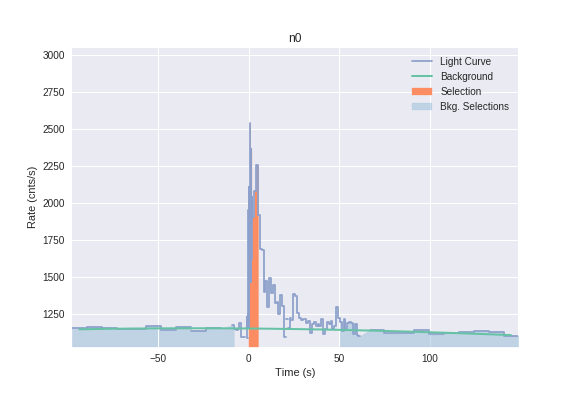

<IPython.core.display.Javascript object>


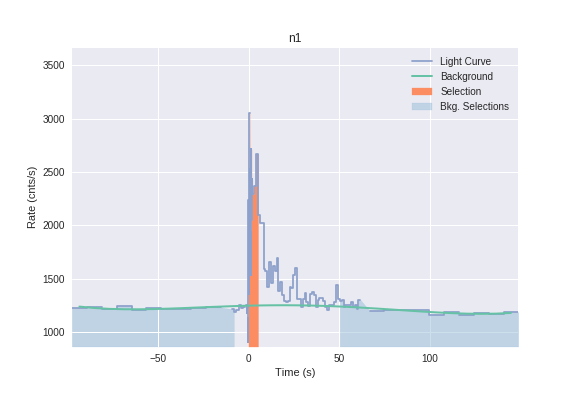

<IPython.core.display.Javascript object>


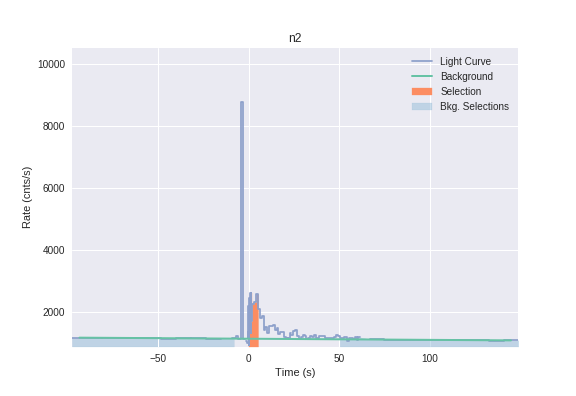

<IPython.core.display.Javascript object>


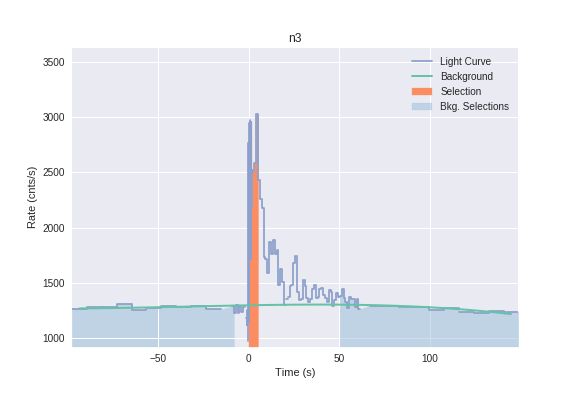

<IPython.core.display.Javascript object>


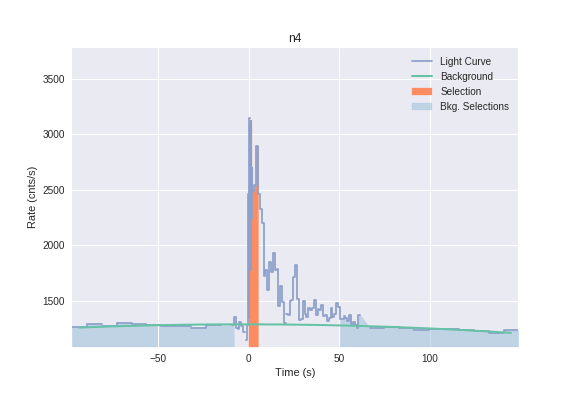

<IPython.core.display.Javascript object>


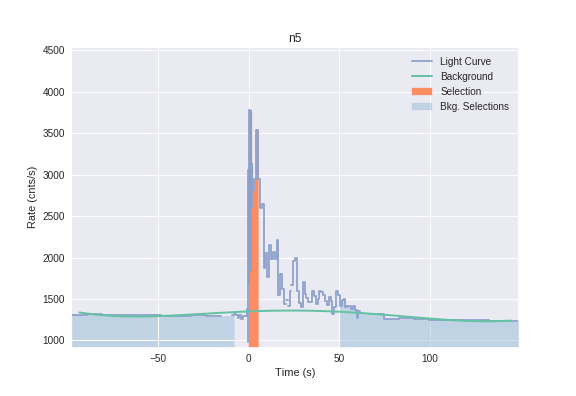

<IPython.core.display.Javascript object>


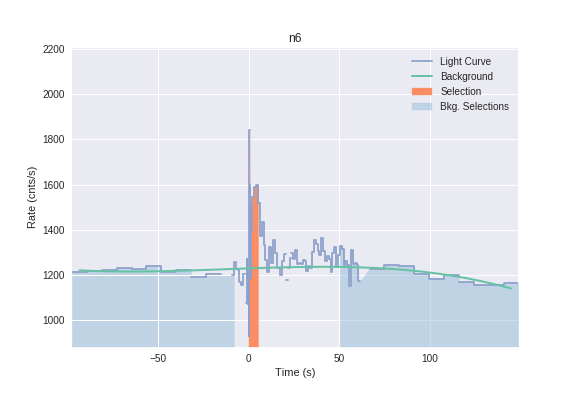

<IPython.core.display.Javascript object>


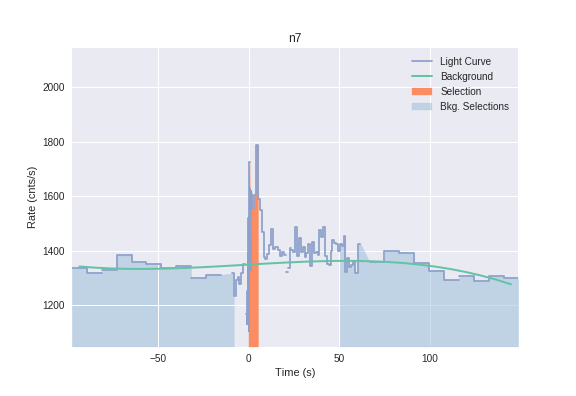

<IPython.core.display.Javascript object>


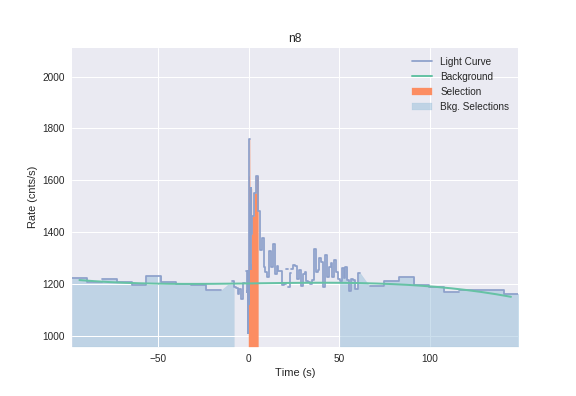

<IPython.core.display.Javascript object>


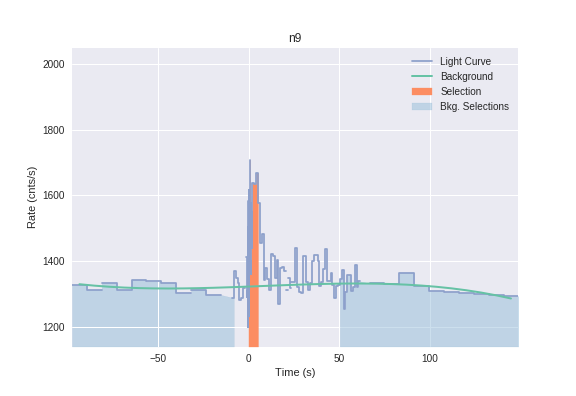

<IPython.core.display.Javascript object>


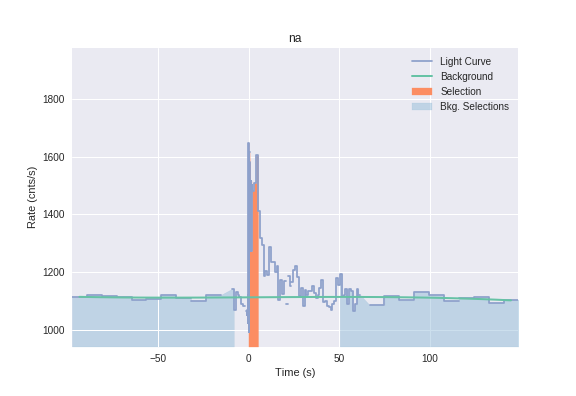

<IPython.core.display.Javascript object>


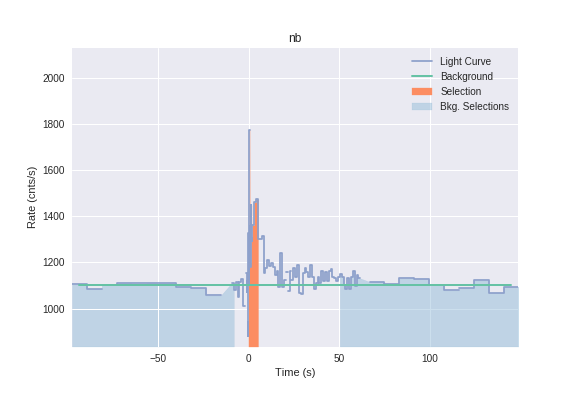

<IPython.core.display.Javascript object>


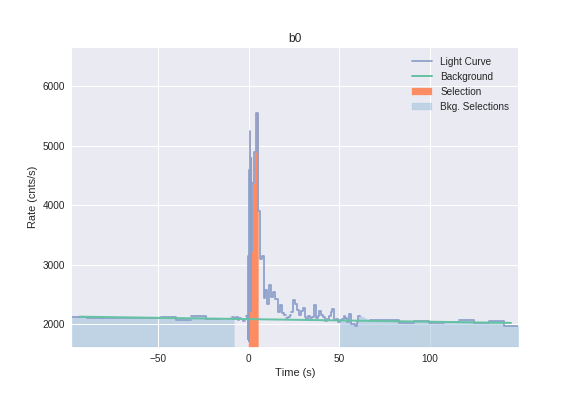

<IPython.core.display.Javascript object>


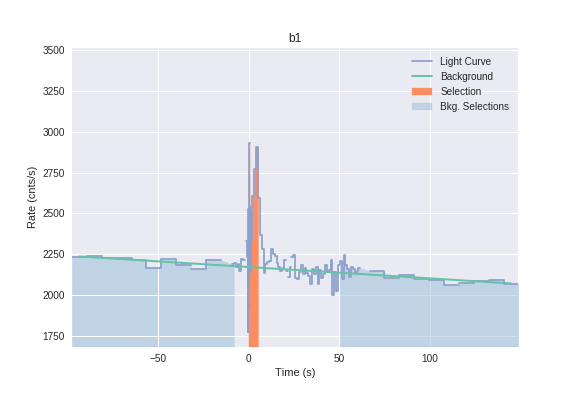

In [35]:
trig_reader.view_lightcurve(start=-100, stop=150)

In [37]:
trigdat_plugin =trig_reader.to_plugin(*det_list)

Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed n

In [38]:
det_dict = dict()

for plugin in trigdat_plugin:
    det_dict[plugin.name] = plugin

In [66]:
sig = []

for key in det_dict.keys():
    if key != 'b0' and key != 'b1':
        print key, '\t', round(det_dict[key].significance,1)
        sig.append(det_dict[key].significance)
    
    
sig = np.array(sig)

na 	21.3
nb 	16.6
n8 	16.0
n9 	13.8
n0 	47.5
n1 	53.8
n2 	61.1
n3 	64.2
n4 	65.2
n5 	76.3
n6 	14.4
n7 	12.8


In [68]:
config_data = {}

config_data['trigger'] = trigger
config_data['det_list'] = det_list
config_data['spectrum'] = 'cpl'
config_data['src_interval'] = src_interval
config_data['bkg_interval'] = bkg_interval

with open('config_data'+trigger+'.json', 'w') as outfile:
    json.dump(config_data, outfile)